In [10]:
import sys
import numpy as np

# Personal imports
sys.path.append("/Users/uriel/disks/meso_H/projects/pRF_analysis/analysis_code/utils")
from pycortex_rois_utils import *
from surface_utils import load_surface
from pycortex_utils import draw_cortex, set_pycortex_config_file, get_rois
from cifti_utils import from_170k_to_59k, from_59k_to_170k


In [2]:
subject = 'sub-hcp1.6mm'
format_ = '170k'
rois_method_format = 'rois-group-mmp'
roi = 'V1'

In [3]:
fn = '/Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/cortex/db/sub-hcp1.6mm/rois/sub-hcp1.6mm_170k_rois-group-mmp.npz'

mask = dict(np.load(fn))

fn2 = '/Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/cortex/db/sub-hcp1.6mm/masks/170k_cortex_mask.npz'
brain_mask = dict(np.load(fn2))
brain_mask = brain_mask['brain_mask']

In [4]:

data = np.ones_like(mask[roi], dtype=int)
data = data[brain_mask]

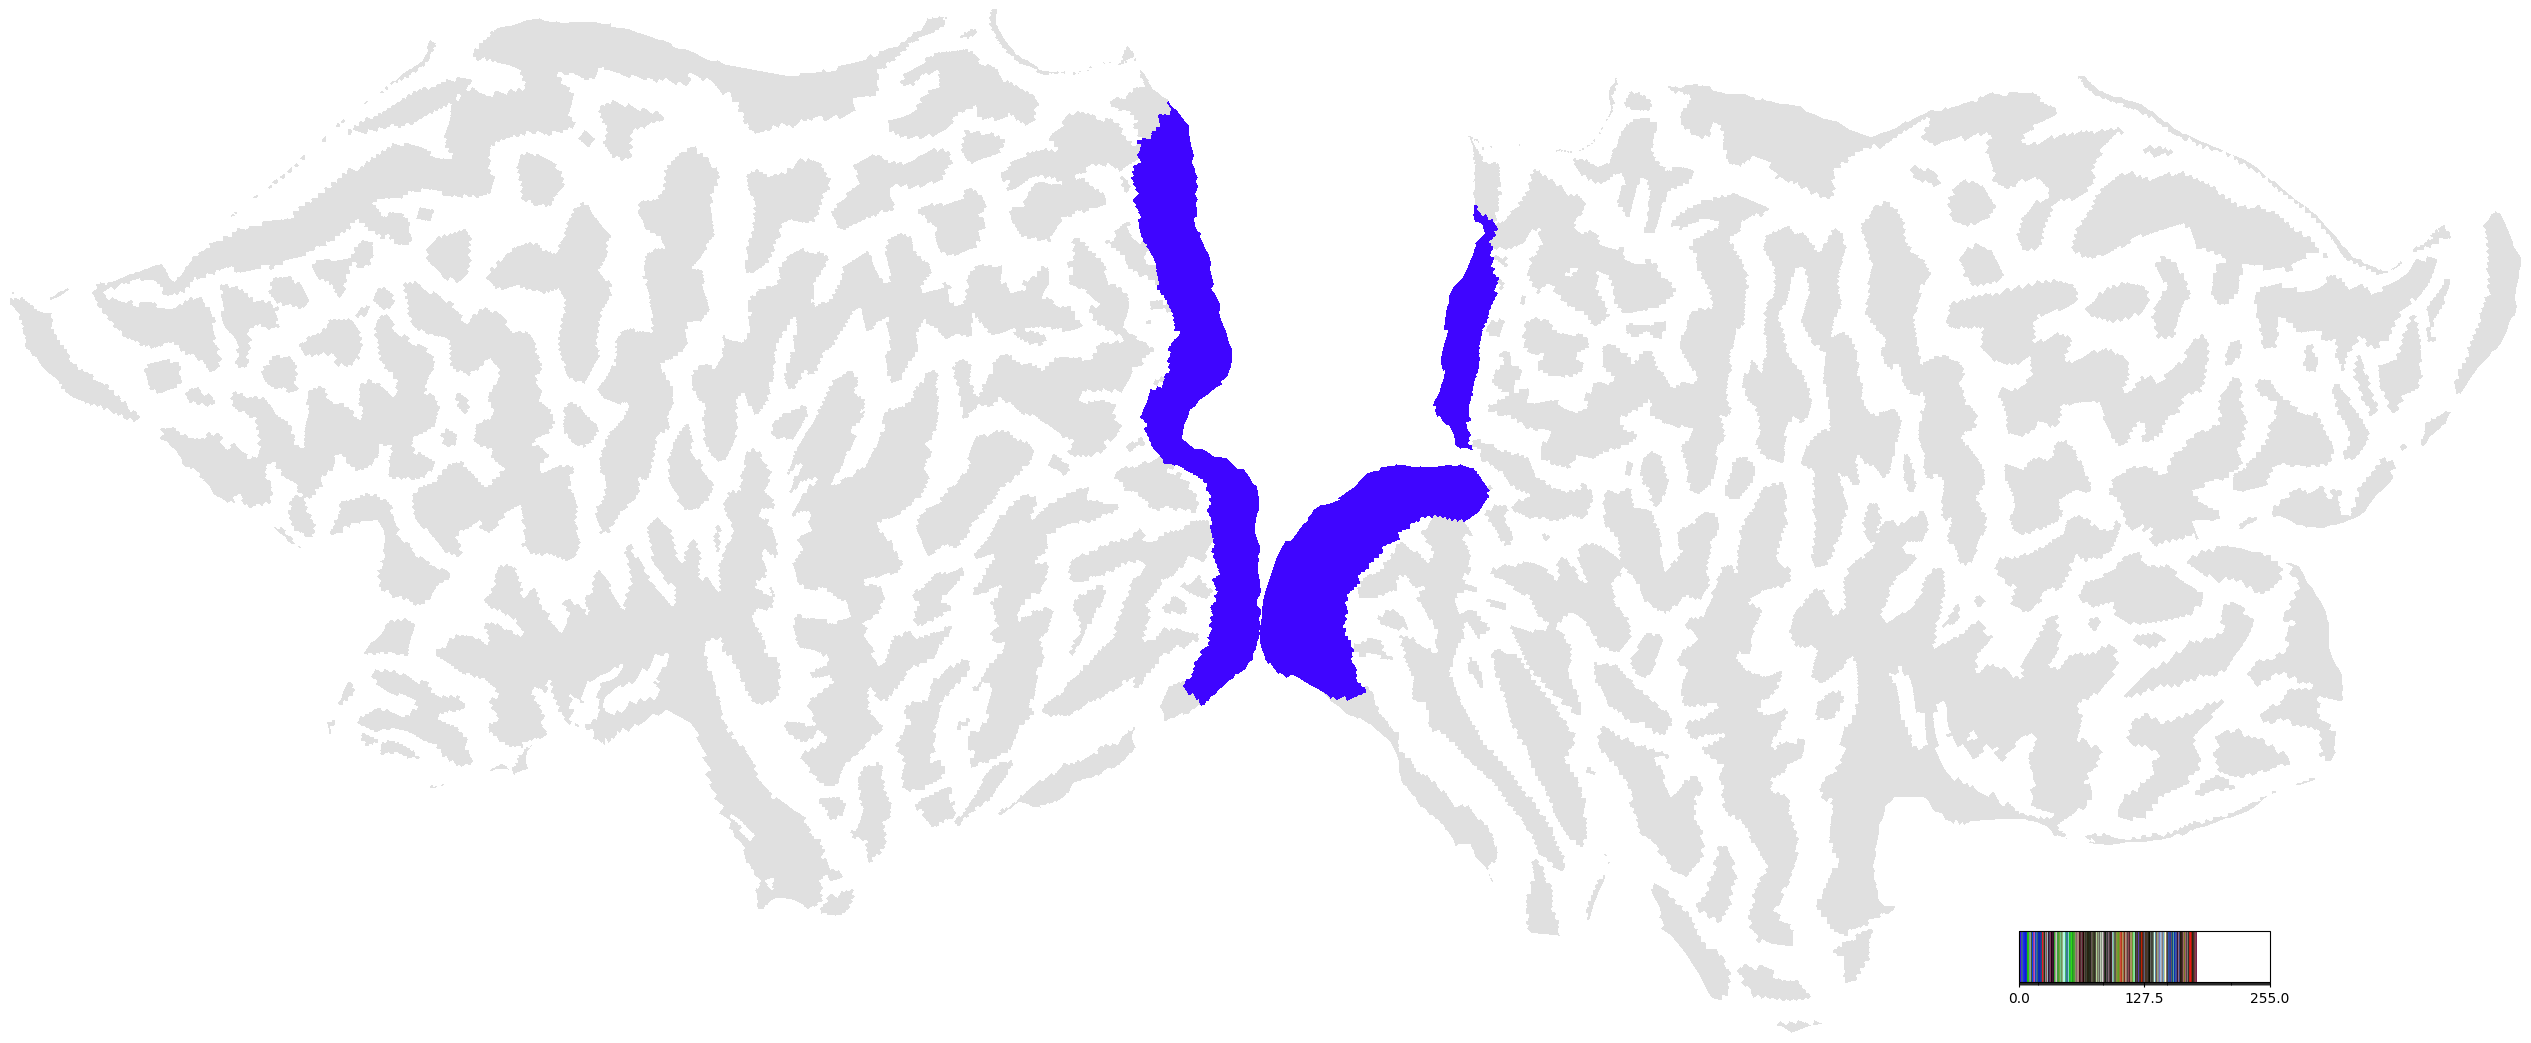

In [33]:
colormap_name = 'HCP_MMP1'
alpha = mask[roi].astype(int)
alpha = alpha[brain_mask]
roi_name = 'glasser-mmp'
param_rois = {'subject': subject,
              'data': data, 
              'cmap': colormap_name,
              'alpha': alpha,
              # 'alpha': deriv_mat,
              'cbar': 'discrete', 
              'vmin': 0,
              'vmax': 255,
              'cmap_steps': 255,
              'cortex_type': 'VertexRGB',
              'description': 'Gaussian pRF ROIs',
              'curv_brightness': 1, 
              'curv_contrast': 0.25,
              'add_roi': True,
              'with_labels': True,
              'roi_name': roi_name}

# Plot
volume_roi = draw_cortex(**param_rois)

In [25]:
alpha

array([0, 0, 0, ..., 0, 0, 0], shape=(170494,))

In [21]:
rois = roi_verts_dict = get_rois(subject=subject, 
                          surf_format=format_, 
                          rois_type=rois_method_format,
                          mask=True, 
                          rois=None, 
                          hemis=['hemi-L','hemi-R']
                         )

In [22]:
rois

{'hemi-L': {'V1': array([False, False, False, ..., False, False, False], shape=(170494,)),
  'V2': array([False, False, False, ..., False, False, False], shape=(170494,)),
  'V3': array([False, False, False, ..., False, False, False], shape=(170494,)),
  'V3AB': array([False, False, False, ..., False, False, False], shape=(170494,)),
  'LO': array([False, False, False, ..., False, False, False], shape=(170494,)),
  'VO': array([False, False, False, ..., False, False, False], shape=(170494,)),
  'hMT+': array([False, False, False, ..., False, False, False], shape=(170494,)),
  'iIPS': array([False, False, False, ..., False, False, False], shape=(170494,)),
  'sIPS': array([False, False, False, ..., False, False, False], shape=(170494,)),
  'iPCS': array([False, False,  True, ..., False, False, False], shape=(170494,)),
  'sPCS': array([False, False, False, ..., False, False, False], shape=(170494,)),
  'mPCS': array([False, False, False, ..., False, False, False], shape=(170494,))},
 'h

In [10]:
data = np.ones_like(rois[roi], dtype=int)
data = data[brain_mask]

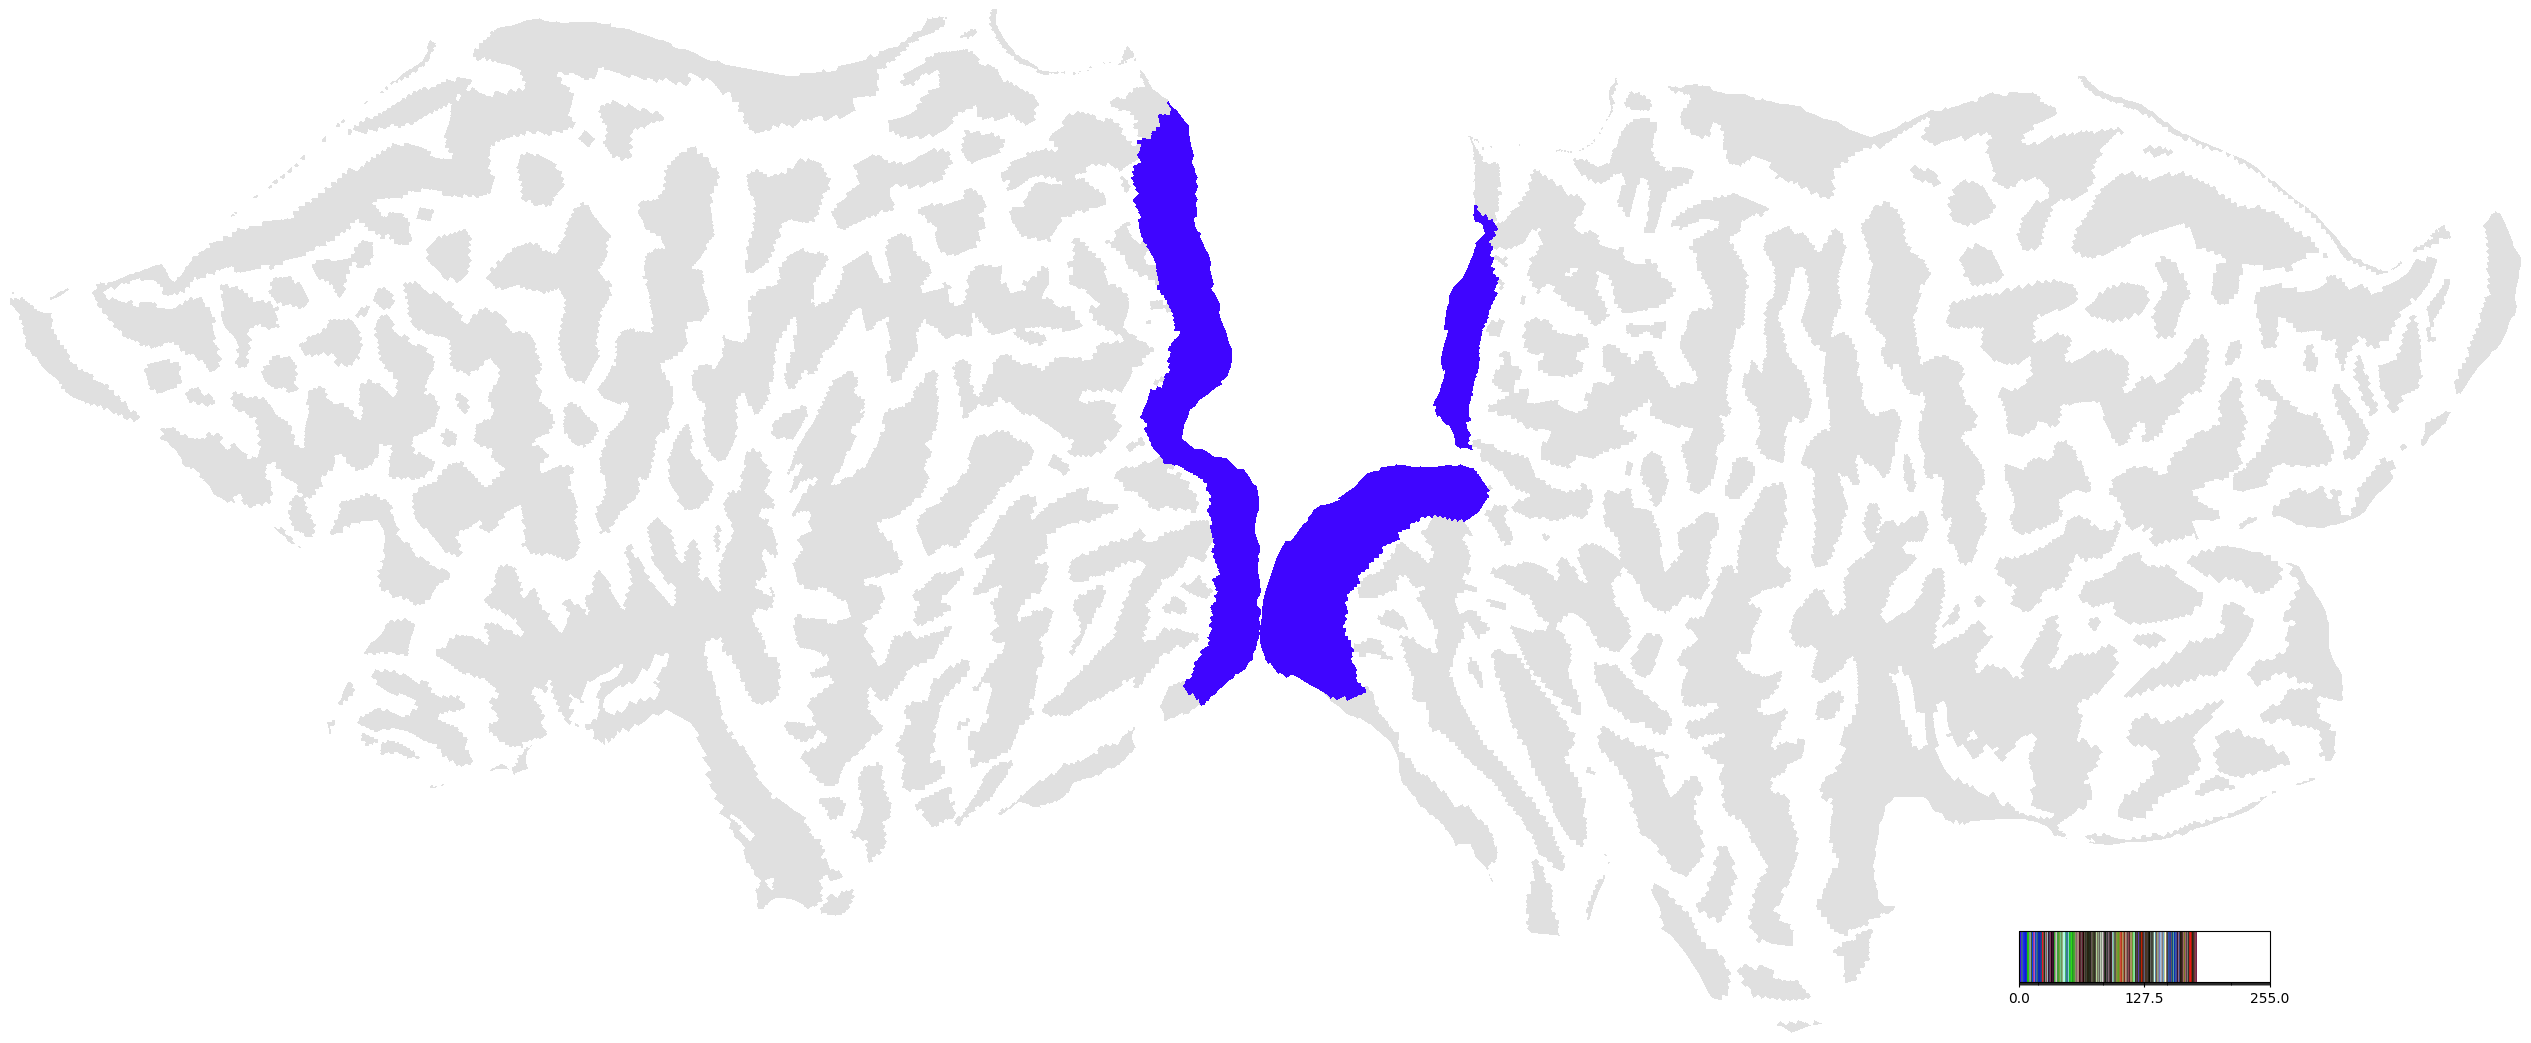

In [11]:
colormap_name = 'HCP_MMP1'
alpha = mask[roi].astype(int)
alpha = alpha[brain_mask]
roi_name = 'glasser-mmp'
param_rois = {'subject': subject,
              'data': data, 
              'cmap': colormap_name,
              'alpha': alpha,
              # 'alpha': deriv_mat,
              'cbar': 'discrete', 
              'vmin': 0,
              'vmax': 255,
              'cmap_steps': 255,
              'cortex_type': 'VertexRGB',
              'description': 'Gaussian pRF ROIs',
              'curv_brightness': 1, 
              'curv_contrast': 0.25,
              'add_roi': True,
              'with_labels': True,
              'roi_name': roi_name}

# Plot
volume_roi = draw_cortex(**param_rois)

In [12]:
array_rois = np.zeros(len(next(iter(rois.values()))), dtype=int)  
for i, (key, mask) in enumerate(rois.items(), 1):
    array_rois[mask] = i

In [14]:
array_rois[brain_mask]

array([ 0,  0, 10, ...,  0,  0,  0], shape=(118584,))

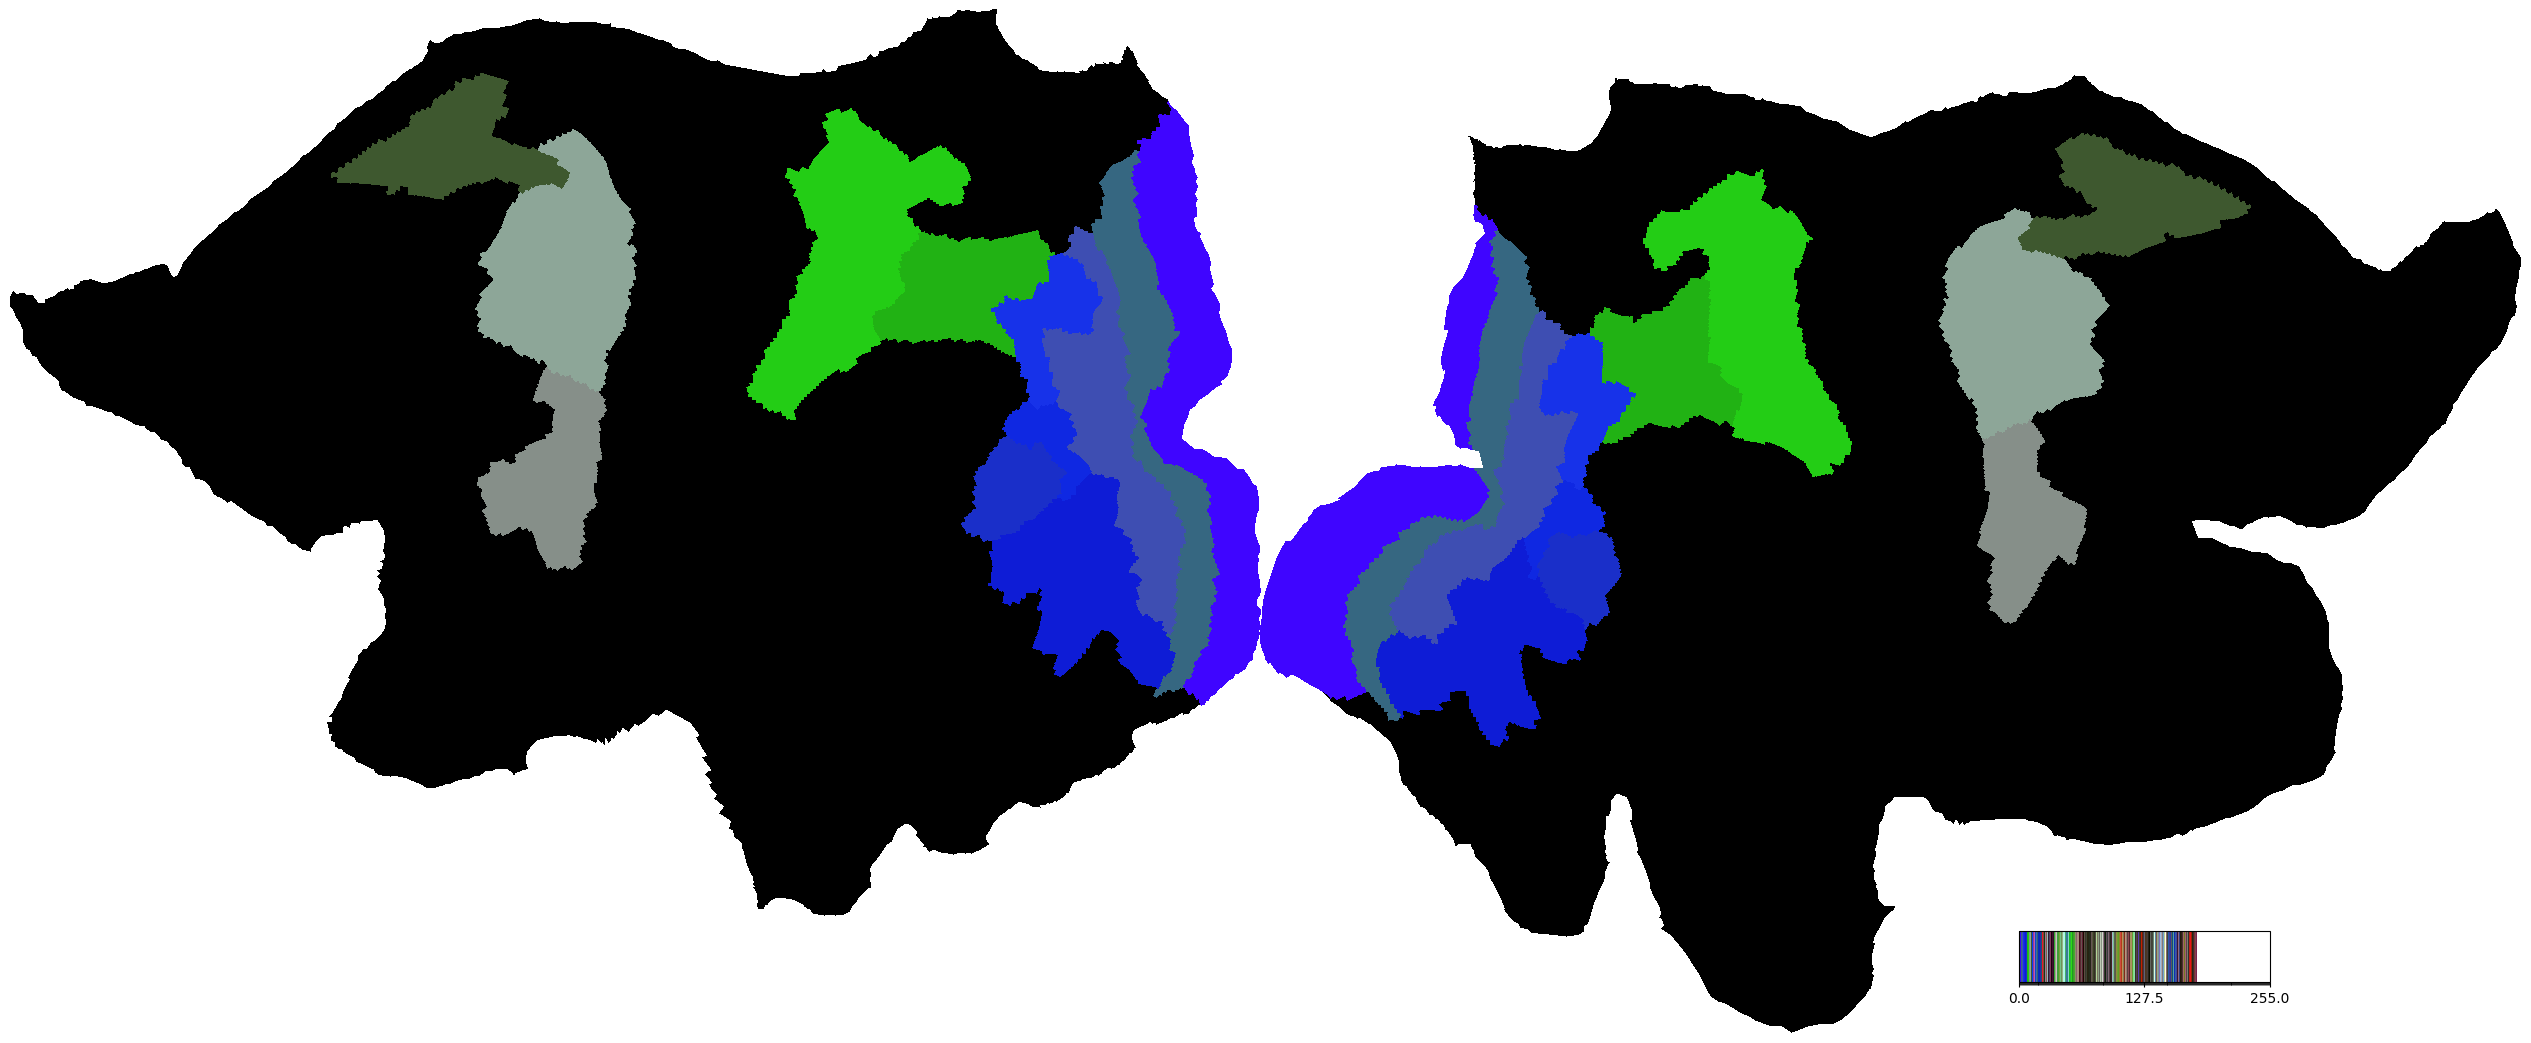

In [17]:
colormap_name = 'HCP_MMP1'
# alpha = rois[roi].astype(int)
# alpha = alpha[brain_mask]

alpha = np.ones_like(array_rois[brain_mask])


roi_name = 'glasser-mmp'
param_rois = {'subject': subject,
              'data': array_rois[brain_mask], 
              'cmap': colormap_name,
              'alpha': alpha,
              # 'alpha': deriv_mat,
              'cbar': 'discrete', 
              'vmin': 0,
              'vmax': 255,
              'cmap_steps': 255,
              'cortex_type': 'VertexRGB',
              'description': 'Gaussian pRF ROIs',
              'curv_brightness': 1, 
              'curv_contrast': 0.25,
              'add_roi': True,
              'with_labels': True,
              'roi_name': roi_name}

# Plot
volume_roi = draw_cortex(**param_rois)

In [5]:
img, data = load_surface('/Users/uriel/disks/meso_shared/RetinoMaps/derivatives/pp_data/sub-03/170k/rois/sub-03_fmriprep_dct_z-score_rois-mmp.dtseries.nii')


In [28]:
# from_170k_to_59k, from_59k_to_170k
results = from_170k_to_59k(img, data, False, True)
cortex_mask = results['mask_59k']

brain_mask = from_59k_to_170k(cortex_mask.astype(int).reshape(1, -1), cortex_mask)
brain_mask = np.nan_to_num(brain_mask, nan=0).astype(int)
# brain_mask_dict = {'brain_mask': brain_mask.astype(bool).squeeze()}

In [26]:
cortex_mask

array([ True,  True,  True, ...,  True,  True,  True], shape=(118584,))

In [29]:
np.sum(brain_mask[0,:] == 1)

np.int64(108441)

In [30]:
brain_mask

array([[1, 1, 1, ..., 0, 0, 0]], shape=(1, 170494))

In [30]:
results = from_170k_to_59k(img, data, return_concat_hemis=True, return_59k_mask=False)

In [31]:
data_concat = results['data_concat']

In [35]:
data2 = data.squeeze()
data2 = data2[brain_mask]

NameError: name 'plt' is not defined

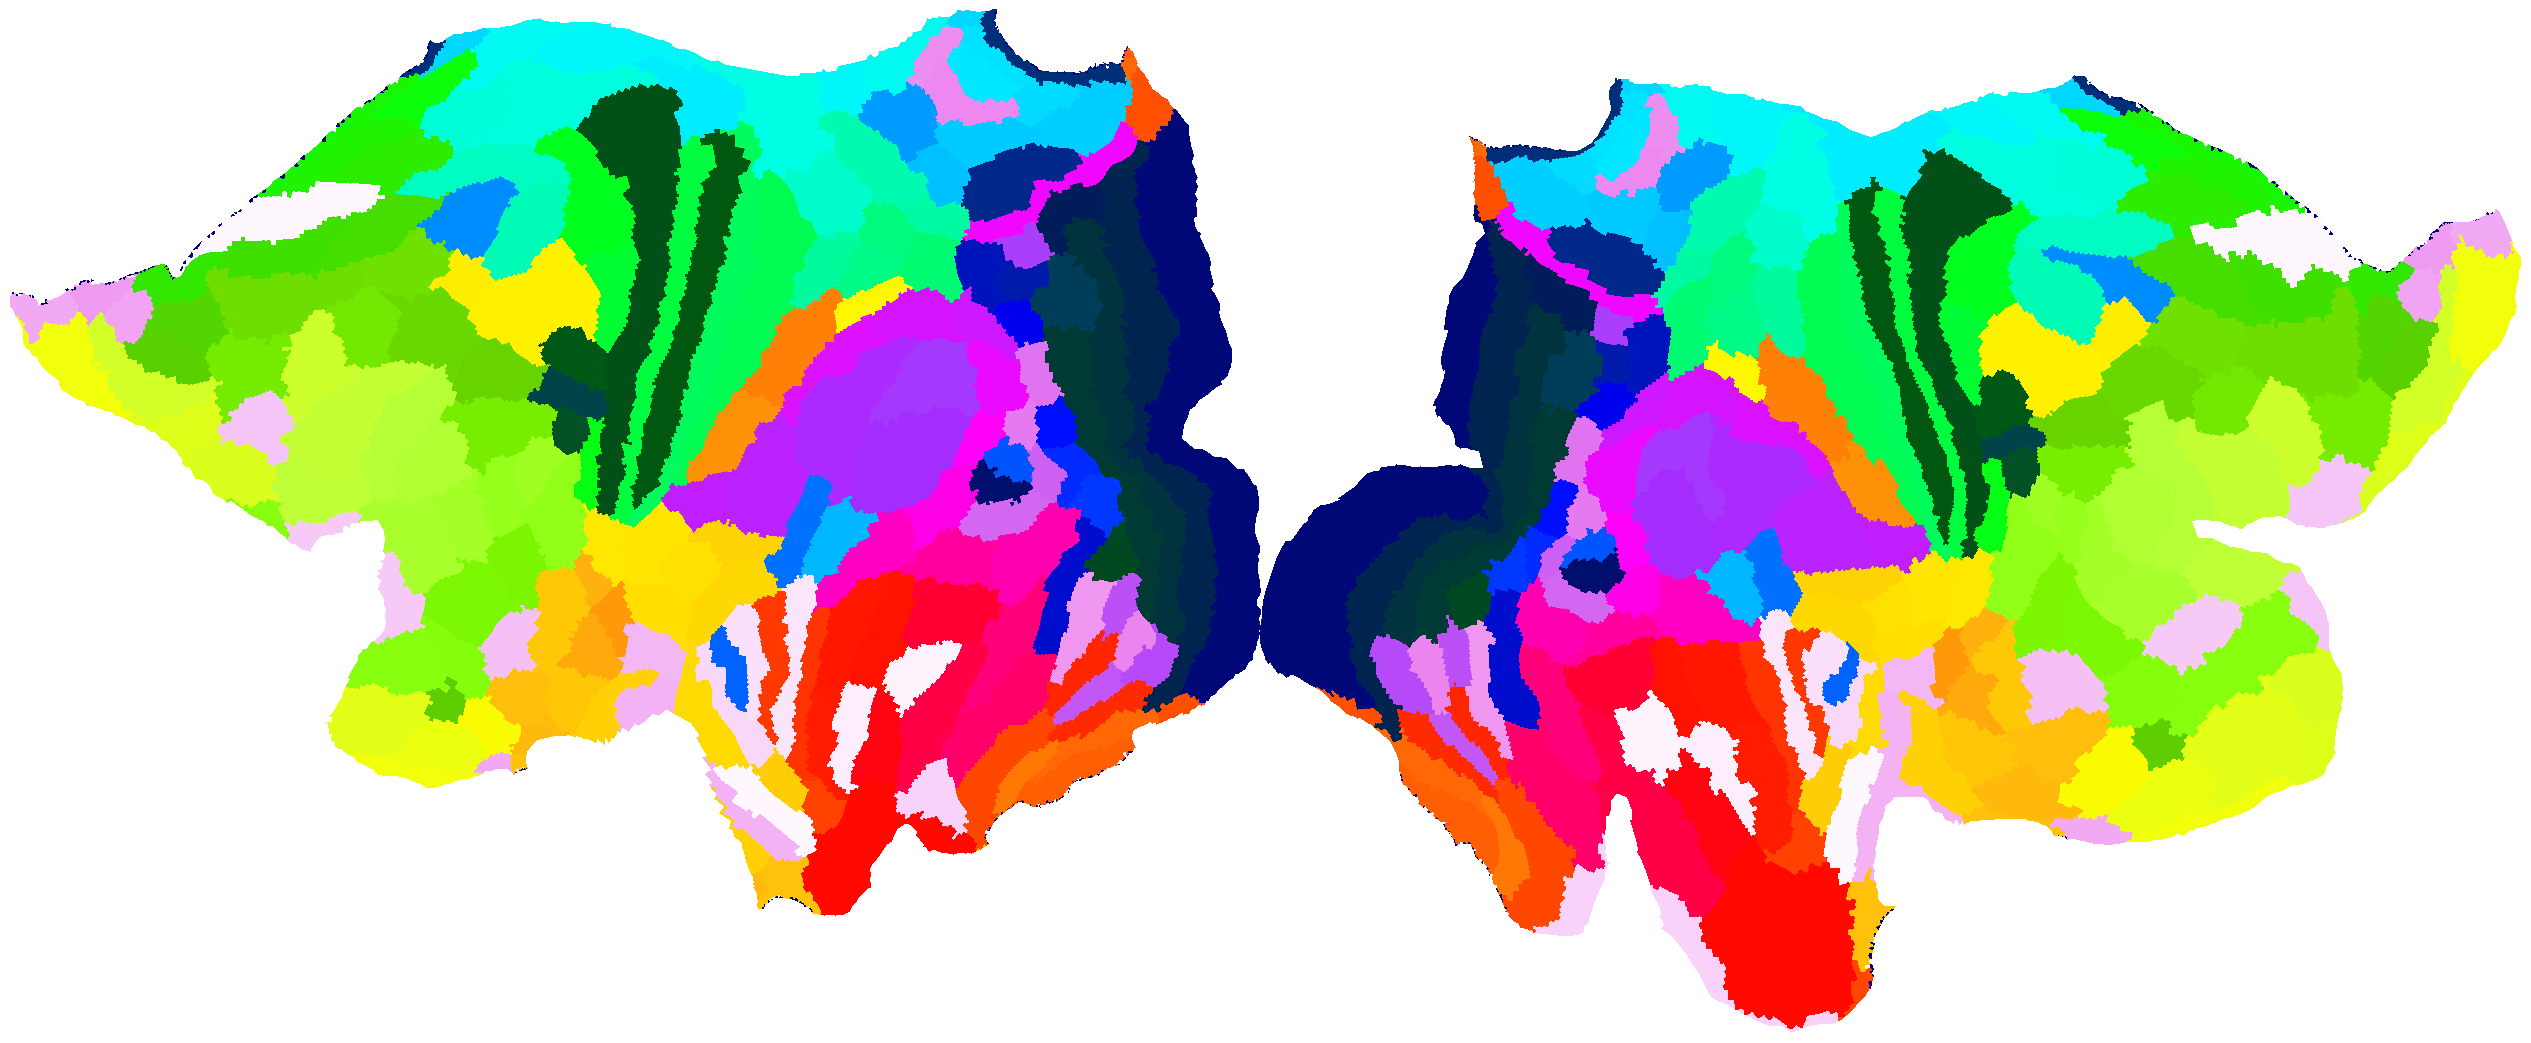

In [37]:
vertex_data = cortex.Vertex(data_concat, subject, cmap='gist_ncar')

cortex.quickshow(vertex_data, with_colorbar=False)
plt.title("MMP atlas", fontsize=25)

# plt.show()

In [15]:
brain_mask_int = brain_mask.astype(int)

In [9]:
data[0,brain_mask]

array([34., 52., 12., ..., nan, nan, nan], shape=(118584,))

In [60]:
vtx_indices_L.max() + 1 + data_L.shape[1:]

array([59293])

In [65]:
brain_mask

array([ True,  True,  True, ..., False, False, False], shape=(170494,))

In [42]:
surf_data_R

array([[ 35.,  39.,  12., ..., 133., 133., 133.]], shape=(1, 59292))

In [44]:
brain_model.iter_structures()

<generator object BrainModelAxis.iter_structures at 0x10d82f140>